## Análise Exploratória com Matplotlib
<br>
<div>
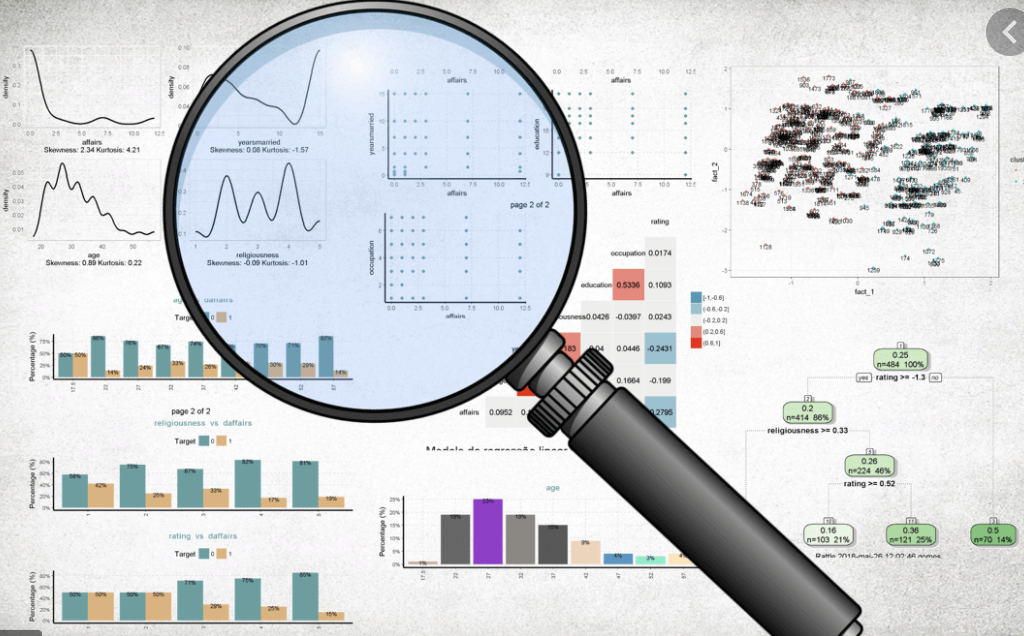
</div>



### Aula 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### **Conhecendo os dados** 

In [2]:
df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- passengerid = ID do passageiro;
- survived = 1 se sobreviveu, 0 caso contrário.
- pclass = Tipo de classe de passagem. Possui 3 valore sendo 1 a melhor classe e 3 a pior classe.
- name = Nome do passageiro
- sex = sexo do passageiro (M e F).
- age = Idade do passageiro na data do naufrágio.
- sibsp = Número de irmãos / cônjuges a bordo.
- parch = Número de pais / filhos a bordo.
- ticket = Código do ticket.
- fare = Valor da passagem.
- cabin = Código da Cabine.
- embarked = Local de embarque.

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Tipos de dados:

Numéricas: 
- variáveis discretas: sibSp<br>
- variáveis contínuas: fare e age.<br>
- binária: survived (booleano).

Categóricas: 
- nominais: Name, Sex<br>
- Ordinal: cabin


- **Análise de preenchimento dos dados**

In [4]:
# Avaliar o que são os nulos com a área responsável pela base / técnicas de preenchimento

print("Total de passageiros:", df.PassengerId.count())
print("\nTotal de informação nula na base:",df.isnull().sum().sum())
print("\nTotal de nulos por variável:\n", df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False))
print("\nTotal de linhas completamente preenchidas:", df.dropna().shape[0])

Total de passageiros: 891

Total de informação nula na base: 866

Total de nulos por variável:
 Cabin       687
Age         177
Embarked      2
dtype: int64

Total de linhas completamente preenchidas: 183


- **Análise de outlier**

Encontrar valores atípicos nos dados.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Vamos analisar melhor a variável fare. Parece que temos alguns dados discrepantes, puxando a média para cima.Observem a diferença entre média e mediana!

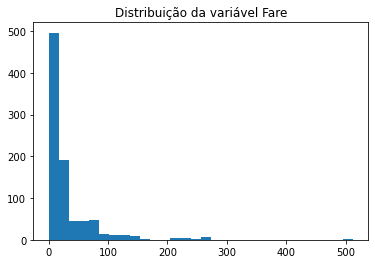

In [6]:
#Fare é variável númerica contínua logo uma boa escolha de gráfico é o histograma.

plt.hist(df.Fare, bins = 30)
plt.title("Distribuição da variável Fare")
plt.show()

In [7]:
#90% das passagens pagas são menores que 78.

np.percentile(df.Fare,90)

77.9583

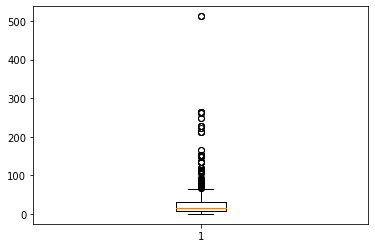

In [8]:
#outra visualização seria o boxplot:

plt.boxplot(df.Fare)
plt.show()

Os outliers podem acabar distorcendo nossa visão sobre um conjunto de dados. Sempre que um conjunto de dados tiver
ouliers, precisando ter cuidado de qual métrica usar para resumir os dados, qual modelo usar e também conhecer
técnicas para trabalhar com eles.

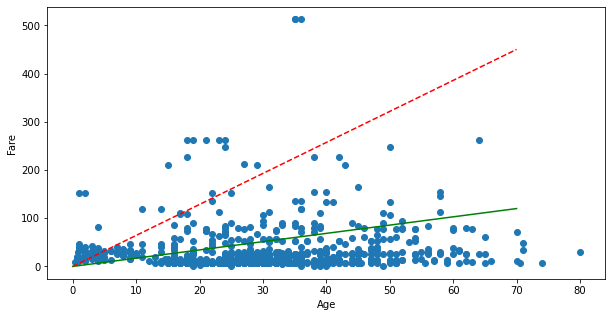

In [9]:
#Motivação com regressão linear:

plt.figure(figsize=[10,5])
plt.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')

plt.plot([0,70],[0,120], c= 'green')
plt.plot([0,70],[0,450], '--', c='red')
plt.show()

In [10]:
#Função que calcula todos os componentes do boxplot e assim é possível identificar os outliers a partir do LS e LI.

#vejam que o 1.5 é um parâmetro. Esse valor pode ser alterado por você de acordo com seu estudo. Só esteja ciente que 
#sempre que mudar esse valor, mudamos a quantidade de outliers detectada.

def detecta_outlier(x, limite = 1.5):
    dq = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * dq, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * dq, np.max(x))
    print("Limite inferior:", limite_inf)
    print("Limite superior:", limite_sup)
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [11]:
outliers_fare = detecta_outlier(df.Fare)

Limite inferior: 0.0
Limite superior: 65.6344


In [12]:
pd.DataFrame(np.c_[df.Fare.values, outliers_fare], columns=['Fare', 'outlier_fare'])

,Fare,outlier_fare
0,7.2500,0.0
1,71.2833,1.0
2,7.9250,0.0
3,53.1000,0.0
4,8.0500,0.0
...,...,...
886,13.0000,0.0
887,30.0000,0.0
888,23.4500,0.0
889,30.0000,0.0


### Aula 2

#### Análise de frequência

Vamos olhar mais a fundo algumas variáveis do nosso dataframe.


In [ ]:
df.Sex[:5]

In [ ]:
#Tabela de frequência pra uma variável:

tbl_freq_sex = pd.DataFrame(df.Sex.value_counts())
tbl_freq_sex.rename(columns = {'Sex':'freq_abs_sex'}, inplace = True)
tbl_freq_sex['freq_relativa_sex'] = round(tbl_freq_sex.freq_abs_sex  /tbl_freq_sex.freq_abs_sex.sum(),2)

In [ ]:
tbl_freq_sex

In [ ]:
# Podemos ver isso graficamente também com um gráfico de barras

plt.bar(df.Sex.unique(), df.Sex.value_counts(), color = 'lightblue')
plt.title('Distribuição de frequência para variável Sex\n', {'fontsize': 12,'fontweight': 'bold'})
plt.show()

Qual a probabilidade de sobreviver dado que é um homem? e dado que é mulher?

$ P(A|B) = \dfrac{P(A \cap B)}{P(B)}$

In [ ]:
#probabilidade de sobreviver geral:

round(df.Survived.value_counts()/df.Survived.shape[0],2)

In [ ]:
# A: sobreviver
# B: ser homem/mulher

prob_h = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_m = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de sobreviver sendo homem:", round(prob_h,2))
print("Probabilidade de sobreviver sendo mulher:", round(prob_m,2))

#É provável então que exista grande correlação entre ter sobrevevido e o sexo.

Frequência da variável Fare

In [ ]:
#Podemos ver aqui que temos fare == 0 

df.Fare.describe()

In [ ]:
#Vamos investigar quem são os passageiros que aparentemente não pagaram nada pela viagem.

df[df.Fare==0]

In [ ]:
# Vários gráficos numa mesma imagem:

fig = plt.figure(figsize=(15,5)) #tamanho do frame 
plt.subplots_adjust(wspace= 0.5) #espaço entre os graficos
plt.suptitle('Visões diferentes da Fare') #titulo da visão geral (não é o título de cada gráfico)
plt.subplot(1,3,1) #posição do primeiro gráfico (1 linha, 3 colunas, posição 1 )
plt.boxplot(df.Fare, meanline = True)
plt.xlabel('Fare', {'fontsize': 12}) #legenda no eixo x
plt.subplot(1,3,2)
plt.boxplot(df.Fare, showfliers=False)
plt.xlabel('Fare', {'fontsize': 12})
plt.subplot(1,3,3)
plt.hist(df.Fare, bins = 20)
plt.xlabel('Fare', {'fontsize': 12})
plt.show()

Análise da Fare com a Age

In [ ]:
plt.figure(figsize=[12,5])
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
plt.title("Fare vs Age")
plt.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.subplot(1,2,2)
plt.title("Fare vs Age")
plt.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.ylim([-10,300])
plt.show()

#poderíamos filtrar só onde a Fare é diferente de 0 e ver a correlação como ficaria! Testem por aí!

In [ ]:
# df.corr() calcula a correlação te todas com todas as variáveis do df, cujo tipo é numérico. 
# Aqui estamos selecionando apenas a coluna fare.

df.corr()[['Fare']]

Pclass, Fare e Cabin

In [ ]:
df.Cabin.unique()

In [ ]:
# Extraindo apenas a letra da variável cabine

letra_cabine = [i[0] for i in df.Cabin.unique()[1:]]

print(np.unique(letra_cabine))

#Adicionando essa coluna no df
df['Cabin_letter'] = [i[0] for i in df.Cabin.astype(str)]

In [ ]:
df.boxplot('Fare', by = ['Pclass', 'Cabin_letter'], figsize= [15,5])
plt.ylabel('Fare')
plt.title("")
plt.show()

### Aula 3

#### Análise das variáveis relacionando com a variável target

Geralmente quando vamos construir um modelo, por exemplo para prever a renda de alguém, ou se um cliente vai ou não comprar um produto, queremos entender como algumas variáveis conseguem ajudar a explicar esses eventos.

Variáveis que tenham correlação com o que queremos prever são boas candidatas! 

In [ ]:
print("Tipo da variável:",df.Survived.dtype)
print("\nPercentual de nulos:", df.Survived.isnull().sum()/df.Survived.shape[0], "%")
print("\nPossíveis valores:", df.Survived.unique())
print("\nFrequência de cada possível valor:\n", df.Survived.value_counts())
print("\nFrequência relativa de cada possível valor/ Probabilidade de sobreviver geral:\n", round(df.Survived.value_counts()/df.Survived.shape[0],2))

Como está a distribuição da variável survived em cada local de embarque?

In [ ]:
df_embarked = df.groupby('Embarked').apply(lambda x: x.Survived.value_counts()).unstack()
df_embarked_pct = df.groupby('Embarked').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()
print(df_embarked)
print()
print(df_embarked_pct.sort_values(by = 0))

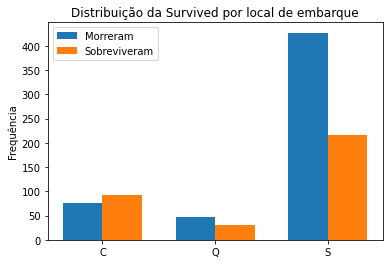

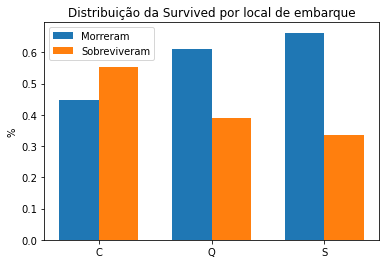

In [36]:
labels = list(df_embarked.index) #labels do gráfico de barras

morreram = df_embarked[0].values #valores para construção do grafico de barras
sobreviveram = df_embarked[1].values #valores para construção do grafico de barras

morreram_pct = df_embarked_pct[0].values #valores para construção do grafico de barras
sobreviveram_pct= df_embarked_pct[1].values #valores para construção do grafico de barras


x = np.arange(len(labels))  #localização dos labels
width = 0.35  # largura das barras

fig, ax = plt.subplots() #construção do frame, criando figura e eixos

rects1 = ax.bar(x - width/2, morreram, width, label='Morreram') #valores para construção do gráfico de barras
rects2 = ax.bar(x + width/2, sobreviveram, width, label='Sobreviveram')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência') #legenda eixo y
ax.set_title('Distribuição da Survived por local de embarque') #titulo
ax.set_xticks(x) #seta a posição dos labels
ax.set_xticklabels(labels) # legenda dos labels do eixo x
ax.legend() #legenda do gráfico
plt.show()

fig, ax1 = plt.subplots()
rects3 = ax1.bar(x - width/2, morreram_pct, width, label='Morreram')
rects4 = ax1.bar(x + width/2, sobreviveram_pct, width, label='Sobreviveram')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('%')
ax1.set_title('Distribuição da Survived por local de embarque')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()

Vamos analisar agora a relação da fare com a survived. Será que quem pagou mais foi priorizado de alguma maneira?

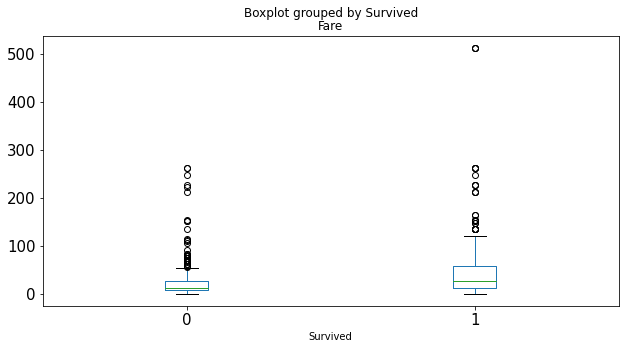

In [37]:
df.boxplot(column= 'Fare', by = 'Survived',fontsize=15,figsize=[10,5],grid = False )

plt.show()

Vamos quantificar essa relação calculando o $R^{2}$ (como vimos em aula)

In [38]:
#Calculando a variância global da fare
var_global = np.var(df.Fare)

#calculando a variância em cada categoria da Survived
var_categ = df.groupby('Survived').apply(lambda x: np.var(x.Fare))
total_categ = df.Survived.value_counts()

#Variância ponderada pelo número de observações na categoria
var_ = (total_categ[0] * var_categ[0] + total_categ[1]* var_categ[1])/ (total_categ[0] + total_categ[1])

#r quadrado
r_quad = (var_global - var_)/ var_global ; 

print("O r-quadrado para Suvived e Fare é:", round(r_quad*100,2))

O r-quadrado para Suvived e Fare é: 6.62


Vemos que a correlação das variáveis Fare e Survived é baixa, no sentido de que apenas 6% da variância da Fare é
explicada pela variável Survived. Então, não tivemos ganho significativo na redução da variância da Fare usando 
a survived (podemos até dizer que se quiséssemos prever a Fare provavelmente a survived não seria boa preditora).

Poderíamos estudar a quantidade de sobreviventes por faixas da variável fare. 
Teste aí! Crie intervalos, faixas da variável fare e conte o número de sobreviventes em cada uma delas.

PClass com a Survived

Queremos entender qual o grau de associação entre as variáveis Pclass e survived, caso exista e para isso faremos as tabelas de frequência, bem como calcularemos o chi-quadrado de person para essa relação

In [39]:
# Distribuição geral da variável survived como já observado antes:

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral

,Survived
0,0.62
1,0.38


In [40]:
# Vamos escrever a tabela de frequencia para os dados observados.

#OBSERVADO:

# Tabela de frequência absoluta -- será usado para o cálculo do chi-quadrado
df_pclass = df.groupby('Pclass').apply(lambda x: x.Survived.value_counts()).unstack()


# Estamos calculando os valores, considerando o total pelas linhas, ou seja, pela variável Pclass
df_pclass_pct = df.groupby('Pclass').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

df_pclass_pct

#Interpretação: 37% de todas as pessoas que estavam com Pclass == 1 morreram, enquanto que 62% sobreviveram

,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Existe relação! Vamos quantificar :)

In [41]:
#tabela de frequência criada acima com os totais em valor absoluto

df_pclass['total'] = df_pclass['total'] = df_pclass[[0]].values + df_pclass[[1]].values 

df_pclass

,0,1,total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491


In [42]:
# Vamos agora calcular a tabela de frequência esperada, caso as duas variáveis não tivesse relação.
# Se esse fosse o caso, esperaríamos ter 62% de zeros e 38% de uns

#ESPERADO:

esp_0 = df_pclass.total.values * dist_geral.iloc[0].values
esp_1 = df_pclass.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

,0,1
0,133.92,82.08
1,114.08,69.92
2,304.42,186.58


In [43]:
# Cálculo do chi-quadrado

# Observado menos o esperado: o_i - e_i == desvio
desvios = (df_pclass.iloc[:,:2].values - df_esp.values)
print(desvios)

#(o_i - e_i)^2
desvios_ao_quadaro = desvios**2

#(o_i - e_i)^2 / e_i

chi_quad = sum(sum(desvios_ao_quadaro/df_esp.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad, "indicando uma 'boa' relação entre as variáveis!")

[[-53.92  53.92]
 [-17.08  17.08]
 [ 67.58 -67.58]]

O chi-quadrado de Pearson é de: 103.34057607970537 indicando uma 'boa' relação entre as variáveis!


In [ ]:
#Podemos também ver isso na tabela de correlação, encarando essas duas variaveis como numéricas
df.corr()

Visualização de correlação de várias variáveis

Usando a informação acima, podemos criar um gráfico que nos dá um maneira visual e rápida de interpretar esses valores 

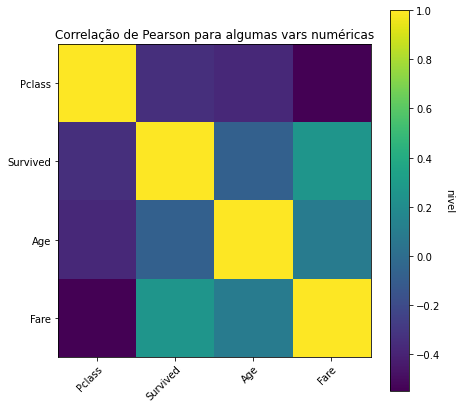

In [44]:
# Filtrando apenas algumas colunas:

columns = ['Pclass','Survived', 'Age', 'Fare']

#calculando a correlação entre elas
corrs = df[['Pclass','Survived', 'Age', 'Fare']].corr().values


fig, ax = plt.subplots(figsize = [7,7])

#Cria a imagem da matriz de correalções
im = ax.imshow(corrs)

#---- Até aqui já teriamos a visualização desejada, mas podemos customizar ainda mais:

# Vamos colocar os nomes das colunas no eixo x e y:

ax.set_xticks(np.arange(len(columns))) #define númeto de itens no eixo
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns) # nomeia os itens do eixo
ax.set_yticklabels(columns)

# Rotacionamos os nomes das colunas para não ficar um nome sobre o outro
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Título do gráfico
ax.set_title("Correlação de Pearson para algumas vars numéricas")

# Criando a barrinha ao lado para legenda das cores:
cbar = ax.figure.colorbar(im, ax=ax) # im - cores, ax - itens do eixo
cbar.ax.set_ylabel('nivel', rotation=-90, va="bottom") # label para a barra
plt.show()

### Aula 4 - Plus

- Meshgrid
- Usado para plot da região de decisão do modelo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Como construímos gráficos?

<div>
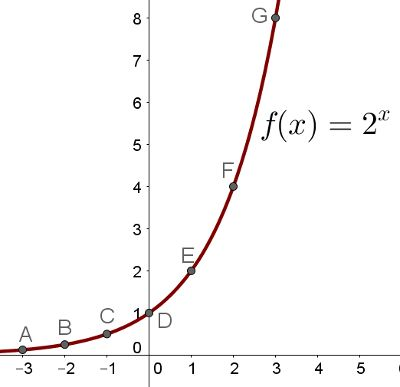
</div>

In [ ]:
#Criando nossa função

def f(x1, x2):
    return x1**2 + x2**2


<div>
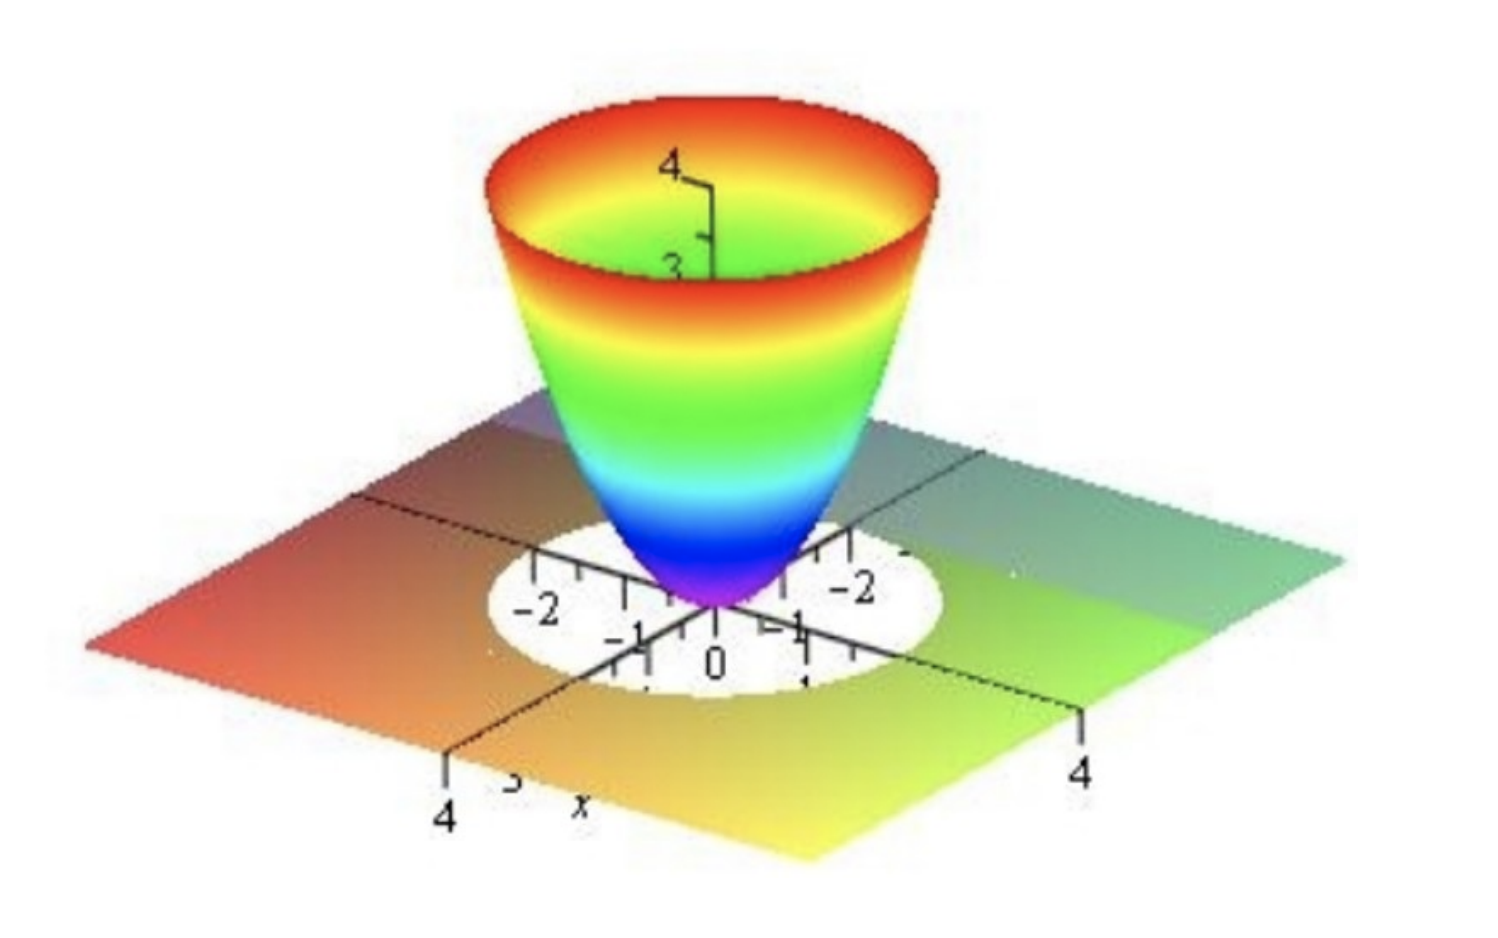
</div>


In [ ]:
#Definindo tamanho dos vetores para o meshgrid

x1_lims = np.arange(-10,10,0.5)
x2_lims = np.arange(-10,10,0.5)

In [ ]:
print(x1_lims.shape)
x1_lims

In [ ]:
plt.scatter(x1_lims, x2_lims)
plt.show()

In [ ]:
# Usando esses dois vetores, queremos criar uma malha. Queremos preencher todo o grafico com pontos. 

def create_meshgrid(x1_lims, x2_lims):
    x1mesh, x2mesh = np.meshgrid(x1_lims, x2_lims)
    return np.c_[x1mesh.ravel(), x2mesh.ravel()]

In [ ]:
mesh = create_meshgrid(x1_lims, x2_lims)
mesh.shape

In [ ]:
mesh

In [ ]:
plt.scatter(mesh[:, 0], mesh[:, 1])
plt.show()

In [ ]:
L = []
for v in mesh:
    x1 = v[0]
    x2 = v[1]
    value_f = f(x1, x2)
    L.append(value_f)

In [ ]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(mesh[:, 0], mesh[:, 1])
plt.subplot(1,2,2)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow) #CMAP = STYLE DE COR
plt.colorbar()
plt.show()

In [ ]:
#diminuindo o tamanho da malha: "vamos simular uma malha contínua"

x1_lims = np.arange(-10,10,0.02)
x2_lims = np.arange(-10,10,0.02)
mesh = create_meshgrid(x1_lims, x2_lims)
mesh.shape

In [ ]:
L = []
for v in mesh:
    x1 = v[0]
    x2 = v[1]
    value_f = f(x1, x2)
    L.append(value_f)

In [ ]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(mesh[:, 0], mesh[:, 1])
plt.subplot(1,2,2)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow)
plt.colorbar()
plt.show()

In [ ]:
# Dica: Seaborn, Pandas profiling, Statistics...